# Capstone Project - The Battle of the Neighborhoods (Week 2 - Notebook) 

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

**Problem statement: **

To understand if both the cities - **Toronto and Manhattan** are similar or dissimilar

* We have lots of details available in terms of venues and its categories, let us see how can we apply the analytical skills to test the hypothesis

* In this project, we are limiting the number of venues by 100 returned by Foursquare API and radius = 500

## Data <a name="data"></a>

The following datasets are used in this project:

* Toronto dataset - Dataset with details about Neighbourhood, latitude, longitude and corresponding venue details
* Manhattan dataset - Dataset with details about Neighbourhood, latitude, longitude and corresponding venue details
* Geospatial_data - Dataset with details about postal code, latitude and longitude
* Foursquare API - To retrieve the venues,its latitude and langitude
* geopy API - To get the coordinates of Toronto and Manhattan

### Importing the necessary libraries

In [100]:
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim
import folium # map rendering library
import requests
import json # library to handle JSON files
import matplotlib.pyplot as plt

### PART A - Preparation of Toronto Data 

Data is obtained from the wikipedia website: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

In [4]:
# Website is already crawled and data is prepared in the earlier assignment and saved.
Neighbourhood_data = pd.read_csv('Neighbourhood_data.csv')
Neighbourhood_data.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [2]:
# Geospatial_data is importing which is used in the earlier assignment
Geospatial_data = pd.read_csv(r'Geospatial_Coordinates.csv')
Geospatial_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [6]:
# Renaming the column postcode
Geospatial_data.rename(columns = {"Postal Code": "Postcode"}, inplace=True)
Geospatial_data.head()

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [7]:
# Combining the neighbourhood data and geospatial data
new_df = pd.merge(Neighbourhood_data, Geospatial_data, how='left', on ='Postcode')
new_df.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [9]:
### Data only boroughs that contain the word Toronto 
Toronto_df = new_df[new_df['Borough'].str.contains('Toronto', regex=False)]
Toronto_df.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [10]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(len(Toronto_df['Borough'].unique()),Toronto_df.shape[0]))

The dataframe has 4 boroughs and 38 neighborhoods.


In [14]:
#### Define Foursquare Credentials and Version
CLIENT_ID = 'Sample' # your Foursquare ID
CLIENT_SECRET = 'Sample' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [413]:
Toronto_df.head()

Toronto_df.rename(columns = {"Neighbourhood": "Neighborhood"}, inplace=True)
Toronto_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Postcode,Borough,Neighborhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


#### Use geopy library to get the latitude and longitude values of Toronto.

In [412]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="To_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


#### Create a map of Toronto with neighborhoods superimposed on top.

In [414]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Toronto_df['Latitude'], Toronto_df['Longitude'], Toronto_df['Borough'], Toronto_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [13]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

In [17]:
Toronto_venues = getNearbyVenues(names=Toronto_df['Neighborhood'],
                                   latitudes=Toronto_df['Latitude'],
                                   longitudes=Toronto_df['Longitude']
                                  )

The Beaches
The Danforth West,Riverdale
The Beaches West,India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park,Summerhill East
Deer Park,Forest Hill SE,Rathnelly,South Hill,Summerhill West
Rosedale
Cabbagetown,St. James Town
Church and Wellesley
Harbourfront,Regent Park
Ryerson,Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide,King,Richmond
Harbourfront East,Toronto Islands,Union Station
Design Exchange,Toronto Dominion Centre
Commerce Court,Victoria Hotel
Roselawn
Forest Hill North,Forest Hill West
The Annex,North Midtown,Yorkville
Harbord,University of Toronto
Chinatown,Grange Park,Kensington Market
CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place,Underground city
Christie
Dovercourt Village,Dufferin
Little Portugal,Trinity
Brockton,Exhibition Place,Parkdale Village
High Park,The Junction South
Parkdale,Roncesvall

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
1,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
2,The Beaches,43.676357,-79.293031,St-Denis Studios Inc.,43.675031,-79.288022,Music Venue
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West,Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


In [44]:
print(Toronto_venues.shape)
Toronto_venues.head()

(1700, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
1,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
2,The Beaches,43.676357,-79.293031,St-Denis Studios Inc.,43.675031,-79.288022,Music Venue
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West,Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


In [46]:
Toronto_venues.to_csv('Toronto_venues.csv' , index=None)

In [19]:
# Let's check how many venues were returned for each neighborhood
Toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide,King,Richmond",100,100,100,100,100,100
Berczy Park,57,57,57,57,57,57
"Brockton,Exhibition Place,Parkdale Village",19,19,19,19,19,19
Business Reply Mail Processing Centre 969 Eastern,17,17,17,17,17,17
"CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara",15,15,15,15,15,15
"Cabbagetown,St. James Town",44,44,44,44,44,44
Central Bay Street,88,88,88,88,88,88
"Chinatown,Grange Park,Kensington Market",100,100,100,100,100,100
Christie,16,16,16,16,16,16


In [296]:
#### Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))

There are 236 uniques categories.


### PART B - Preparation of Manhattan Data 

In [24]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [ ]:
newyork_data

In [295]:
# Notice how all the relevant data is in the *features* key, which is basically a list of the neighborhoods. 
#So, let's define a new variable that includes this data.

neighborhoods_data = newyork_data['features']

#### Tranform the data into a *pandas* dataframe

In [28]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

In [29]:
# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [30]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)


neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [31]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]))


The dataframe has 5 boroughs and 306 neighborhoods.


#### Use geopy library to get the latitude and longitude values of New York City.

In [32]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [33]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [35]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(manhattan_data['Borough'].unique()),
        manhattan_data.shape[0]))

The dataframe has 1 boroughs and 40 neighborhoods.


In [36]:
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [415]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7900869, -73.9598295.


#### Create a map of Manhattan with neighborhoods superimposed on top.

In [416]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Borough'], manhattan_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [38]:
Manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards
(40, 4)


,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [47]:
print(Manhattan_venues.shape)
Manhattan_venues.head()

(3316, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


In [48]:
Manhattan_venues.to_csv('Manhattan_venues.csv' , index=None)

In [41]:
# Let's check how many venues were returned for each neighborhood
Manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,100,100,100,100,100,100
Carnegie Hill,100,100,100,100,100,100
Central Harlem,43,43,43,43,43,43
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,41,41,41,41,41,41
East Village,100,100,100,100,100,100


In [42]:
#### Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(Manhattan_venues['Venue Category'].unique())))

There are 332 uniques categories.


## Methodology <a name="methodology"></a>

It involves the following steps:
* Data Loading and pre-processing
    * Preprocessing the Neighbourhood dataset and creating a subset for Toronto dataset
    * Preprocessing the Manhattan dataset
    * Generating the co-ordinates for both the neighborhoods
* Analysis(Exploratory data analysis)
    * Identification of top venues in both the cities
    * Identification of top restuarents in both the cities
    * Comparsion of number of venues in both the neighborhoods
* Results(Comparision between Toronto and Manhattan)

## Analysis <a name="analysis"></a>

#### Toronto data analysis

In [137]:
Toronto_venues = pd.read_csv('Toronto_venues.csv')

In [138]:
Toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
1,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
2,The Beaches,43.676357,-79.293031,St-Denis Studios Inc.,43.675031,-79.288022,Music Venue
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West,Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


In [322]:
Toronto_venue_neighborhood = Toronto_venues.groupby('Neighborhood').size().sort_values(ascending=False)
Toronto_venue_neighborhood.head(10)

Neighborhood
Adelaide,King,Richmond                             100
St. James Town                                     100
Ryerson,Garden District                            100
Chinatown,Grange Park,Kensington Market            100
Commerce Court,Victoria Hotel                      100
Design Exchange,Toronto Dominion Centre            100
First Canadian Place,Underground city              100
Harbourfront East,Toronto Islands,Union Station    100
Stn A PO Boxes 25 The Esplanade                     95
Central Bay Street                                  88
dtype: int64

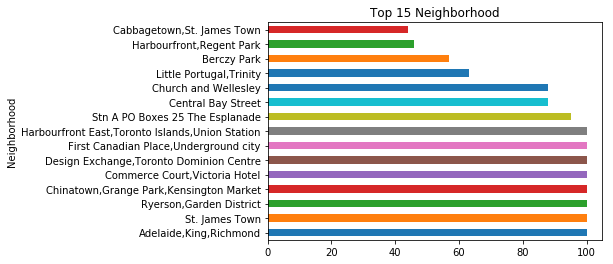

In [336]:
Toronto_venue_neighborhood[:15].plot(kind='barh', title='Top 15 Neighborhood')
plt.show()

In [140]:
Toronto_venue_category = Toronto_venues.groupby('Venue Category').size().sort_values(ascending=False)
Toronto_venue_category.head(10)

Venue Category
Coffee Shop            143
Café                    97
Restaurant              50
Bakery                  44
Italian Restaurant      44
Hotel                   39
Bar                     37
Pizza Place             35
Park                    31
Japanese Restaurant     28
dtype: int64

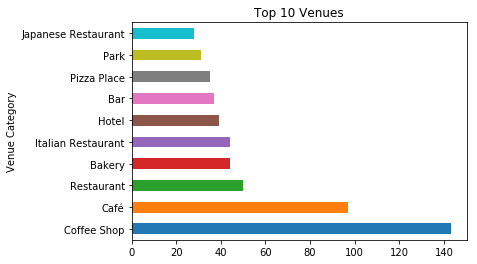

In [302]:
Toronto_venue_category[:10].plot(kind='barh', title='Top 10 Venues')
plt.show()

In [144]:
Toronto_venues_res = Toronto_venues[Toronto_venues['Venue Category'].str.contains('Restaurant', regex=False)]
Toronto_venues_res.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
4,"The Danforth West,Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant
7,"The Danforth West,Riverdale",43.679557,-79.352188,Cafe Fiorentina,43.677743,-79.350115,Italian Restaurant
8,"The Danforth West,Riverdale",43.679557,-79.352188,Mezes,43.677962,-79.350196,Greek Restaurant
9,"The Danforth West,Riverdale",43.679557,-79.352188,Messini Authentic Gyros,43.677827,-79.350569,Greek Restaurant
10,"The Danforth West,Riverdale",43.679557,-79.352188,Christina's On The Danforth,43.678240,-79.349185,Greek Restaurant


In [145]:
Toronto_venues_res1 = Toronto_venues_res.groupby('Venue Category').size().sort_values(ascending=False)
Toronto_venues_res1.head()

Venue Category
Restaurant             50
Italian Restaurant     44
Japanese Restaurant    28
American Restaurant    26
Seafood Restaurant     23
dtype: int64

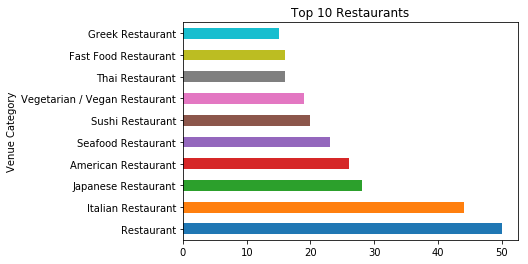

In [320]:
Toronto_venues_res1[:10].plot(kind='barh', title='Top 10 Restaurants')
plt.show()

#### Manhattan data analysis

In [74]:
Manhattan_venues = pd.read_csv('Manhattan_venues.csv')

In [ ]:
Manhattan_venues.head()

In [330]:
Manhattan_venue_neighborhood = Manhattan_venues.groupby('Neighborhood').size().sort_values(ascending=False)
Manhattan_venue_neighborhood.head(40)

Neighborhood
Yorkville              100
Midtown                100
Carnegie Hill          100
Chelsea                100
Chinatown              100
Civic Center           100
Clinton                100
East Village           100
Financial District     100
Flatiron               100
Gramercy               100
Greenwich Village      100
Lenox Hill             100
Lincoln Square         100
Little Italy           100
West Village           100
Battery Park City      100
Soho                   100
Sutton Place           100
Midtown South          100
Upper West Side        100
Murray Hill            100
Noho                   100
Upper East Side        100
Turtle Bay             100
Tribeca                100
Washington Heights      85
Tudor City              81
Hudson Yards            73
Lower East Side         63
Hamilton Heights        60
Manhattan Valley        60
Inwood                  57
Central Harlem          43
Morningside Heights     42
Manhattanville          41
East Harlem    

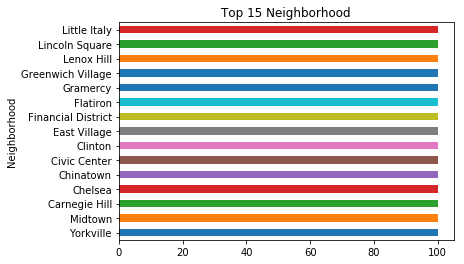

In [337]:
Manhattan_venue_neighborhood[:15].plot(kind='barh', title='Top 15 Neighborhood')
plt.show()

In [71]:
Manhattan_venue_category = Manhattan_venues.groupby('Venue Category').size().sort_values(ascending=False)
Manhattan_venue_category.head(10)

Venue Category
Italian Restaurant     128
Coffee Shop            120
American Restaurant     80
Café                    77
Bakery                  75
Hotel                   68
Pizza Place             67
Park                    63
Gym                     60
Mexican Restaurant      59
dtype: int64

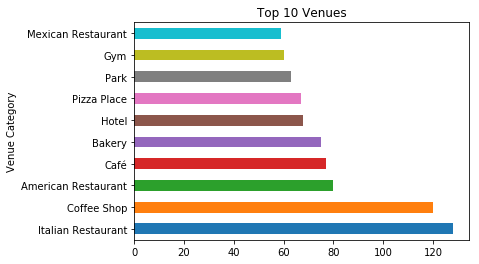

In [307]:
Manhattan_venue_category[:10].plot(kind='barh', title='Top 10 Venues')
plt.show()

In [177]:
Manhattan_venues_res = Manhattan_venues[Manhattan_venues['Venue Category'].str.contains('Restaurant', regex=False)]
Manhattan_venues_res.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
7,Marble Hill,40.876551,-73.910660,Land & Sea Restaurant,40.877885,-73.905873,Seafood Restaurant
19,Marble Hill,40.876551,-73.910660,Boston Market,40.877430,-73.905412,American Restaurant
26,Chinatown,40.715618,-73.994279,Kiki's,40.714476,-73.992036,Greek Restaurant
29,Chinatown,40.715618,-73.994279,Spicy Village,40.717010,-73.993530,Chinese Restaurant
36,Chinatown,40.715618,-73.994279,The Fat Radish,40.715323,-73.991950,English Restaurant


In [178]:
Manhattan_venues_res1 = Manhattan_venues_res.groupby('Venue Category').size().sort_values(ascending=False)
Manhattan_venues_res1.head()

Venue Category
Italian Restaurant     128
American Restaurant     80
Mexican Restaurant      59
French Restaurant       55
Chinese Restaurant      50
dtype: int64

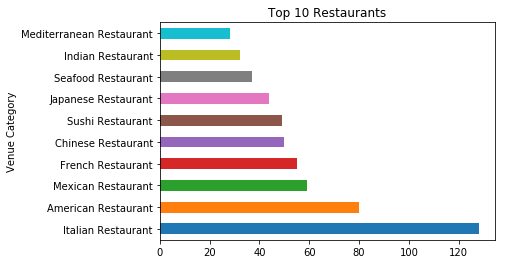

In [305]:
Manhattan_venues_res1[:10].plot(kind='barh', title='Top 10 Restaurants')
plt.show()

## Results <a name="results"></a>

#### Descriptive statistics

It seems though number of Neighborhood are almost same in both the cities, Manhattan has more number of venues/venue categories

In [267]:
Unique_Neighborhood = Toronto_venues['Neighborhood'].nunique()
Unique_Venue = Toronto_venues['Venue'].nunique()
Unique_Venue_category = Toronto_venues['Venue Category'].nunique()

print(f'There are {Unique_Neighborhood} Unique Neighborhood in Toronto')
print(f'There are {Unique_Venue} Unique Venues in Toronto')
print(f'There are {Unique_Venue_category} Unique Venue categories in Toronto')

There are 38 Unique Neighborhood in Toronto
There are 1109 Unique Venues in Toronto
There are 236 Unique Venue categories in Toronto


In [268]:
Unique_Neighborhood = Manhattan_venues['Neighborhood'].nunique()
Unique_Venue = Manhattan_venues['Venue'].nunique()
Unique_Venue_category = Manhattan_venues['Venue Category'].nunique()

print(f'There are {Unique_Neighborhood} Unique Neighborhood in Manhattan')
print(f'There are {Unique_Venue} Unique Venues in Manhattan')
print(f'There are {Unique_Venue_category} Unique Venue categories in Manhattan')

There are 40 Unique Neighborhood in Manhattan
There are 2888 Unique Venues in Manhattan
There are 332 Unique Venue categories in Manhattan


#### Are Venue categories between Toronto and Manhattan are same or different ?

It seems, people in Toronto like more coffee as compared to Italian restaurants in Manhattan

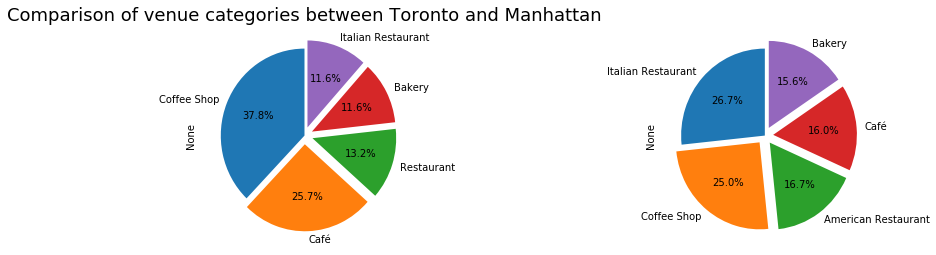

In [211]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). 

# Subplot 1: Box plot
Toronto_venue_category[:5].plot(kind='pie', autopct='%1.1f%%',explode=explode,startangle=90, ax=ax0)
ax0.set_title('Comparison of venue categories between Toronto and Manhattan',fontsize=18)

# Subplot 2: Line plot
Manhattan_venue_category[:5].plot(kind='pie', autopct='%1.1f%%',explode=explode,startangle=90,ax=ax1,figsize=(12, 4))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.2, hspace=None)
plt.show()

#### Are Restaurants categories between Toronto and Manhattan are same or different ?

It seems people in both the cities like more Italian restaurants

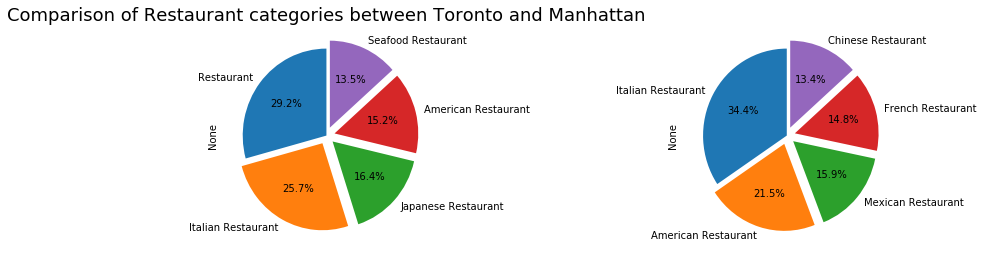

In [208]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). 

# Subplot 1: Box plot
Toronto_venues_res1[:5].plot(kind='pie', autopct='%1.1f%%',explode=explode,startangle=90, ax=ax0)
ax0.set_title('Comparison of Restaurant categories between Toronto and Manhattan',fontsize=18)

# Subplot 2: Line plot
Manhattan_venues_res1[:5].plot(kind='pie', autopct='%1.1f%%',explode=explode,startangle=90, ax=ax1,figsize=(12,4))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.2, hspace=None)
plt.show()

#### Are Neighborhood categories between Toronto and Manhattan are same or different ?

It seems both the top 10 Neighborhood in both the cities has more 100+ venues

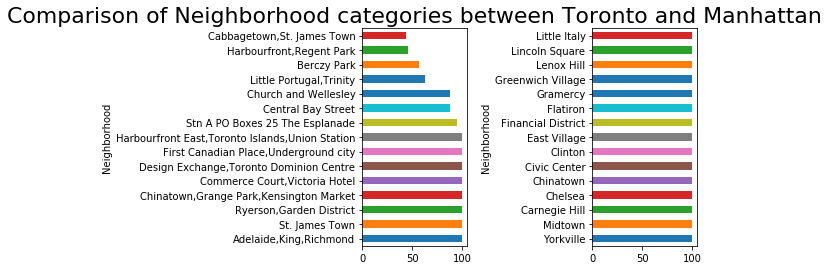

In [361]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). 

# Subplot 1: Box plot
Toronto_venue_neighborhood[:15].plot(kind='barh',ax=ax0)
ax0.set_title('Comparison of Neighborhood categories between Toronto and Manhattan',fontsize=22)

# Subplot 2: Line plot
Manhattan_venue_neighborhood[:15].plot(kind='barh', ax=ax1)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.2, hspace=None)
plt.show()

#### Do we have common venue in both the cities?

In [365]:
Toronto_venues.head(2)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
1,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub


In [364]:
Manhattan_venues.head(2)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio


In [405]:
Common_venue = Toronto_venues.assign(InDf2=Toronto_venues.Venue.isin(Manhattan_venues.Venue).astype(int))

In [406]:
Common_venue.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,InDf2
0,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store,0
1,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub,0
2,The Beaches,43.676357,-79.293031,St-Denis Studios Inc.,43.675031,-79.288022,Music Venue,0
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood,0
4,"The Danforth West,Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant,0


In [408]:
# Presence of common venue in both the cities
Common_venue[Common_venue['InDf2'] == 1].head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,InDf2
47,"The Danforth West,Riverdale",43.679557,-79.352188,Starbucks,43.678730,-79.346188,Coffee Shop,1
63,"The Beaches West,India Bazaar",43.668999,-79.315572,Subway,43.666238,-79.317019,Sandwich Place,1
83,Studio District,43.659526,-79.340923,Starbucks,43.660640,-79.342461,Coffee Shop,1
101,Studio District,43.659526,-79.340923,7-Eleven,43.660897,-79.340159,Convenience Store,1
115,Davisville North,43.712751,-79.390197,Subway,43.708378,-79.390473,Sandwich Place,1


In [409]:
Common_venue[Common_venue['InDf2'] == 1].shape

(108, 8)

In [410]:
Common_venue.Venue[Common_venue['InDf2'] == 1].nunique()

16

#### Verification of common venues in both cities

16 venues are in common in both the cities

In [396]:
Toronto_venues[Toronto_venues['Venue'] == 'Starbucks'].head(2)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
47,"The Danforth West,Riverdale",43.679557,-79.352188,Starbucks,43.67873,-79.346188,Coffee Shop
83,Studio District,43.659526,-79.340923,Starbucks,43.66064,-79.342461,Coffee Shop


In [397]:
Manhattan_venues[Manhattan_venues['Venue'] == 'Starbucks'].head(2)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
8,Marble Hill,40.876551,-73.91066,Starbucks,40.873755,-73.908613,Coffee Shop


## Conclusion <a name="conclusion"></a>

Based on the analysis, the observations are as below:
* It seems though number of Neighborhood are almost same in both the cities, Manhattan has more number of venues/venue categories

* It seems, people in Toronto like more coffee as compared to Italian restaurants in Manhattan

* It seems people in both the cities like more Italian restaurants

* It seems both the top 10 Neighborhood in both the cities has more 100+ venues

* 16 venues are in common in both the cities

Based on observation, it seems both the cities share liking pattern wrt venues